<a href="https://colab.research.google.com/github/TranThanhChien/trafficsignregco/blob/main/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = load_model("/content/drive/MyDrive/phan_loai_bbgt/my_model.h5")

threshold = 0.75  # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    return img

def getClassName(classNo):
    if classNo == 0:
        return "Cấm đỗ xe"
    elif classNo == 1:
        return "Cấm quay đầu"
    elif classNo == 2:
        return "Cấm xe tải hơn 2.5T"
    elif classNo == 3:
        return "Được quay đầu"
    elif classNo == 4:
        return "Cấm rẽ trái"
    elif classNo == 5:
        return "Người đi bộ sang đường"
    elif classNo == 6:
        return "Giao nhau với đường không ưu tiên"
    elif classNo == 7:
        return "Cấm ô tô"
    elif classNo == 8:
        return "Hướng rẽ phải"
    else:
        return "Không nhận được"

def ketqua(predictions,threshold):
    a = list(map(lambda x: float(x), predictions[0]))
    if max(a) > threshold:
        return a.index(max(a))  
    else:
        return -1

def predict_class(img):
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 1)
    predictions = model.predict(img)
    threshold = 0.75
    classIndex = np.argmax(predictions, axis=1) if np.argmax(predictions, axis=1)[0] > threshold else -1
    kq = ketqua(predictions,threshold)
    print(getClassName(kq))
    print(predictions[0][kq])

2_6.png


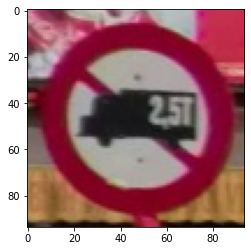

Không nhận được
1.7625642e-07
---------------

3_5.png


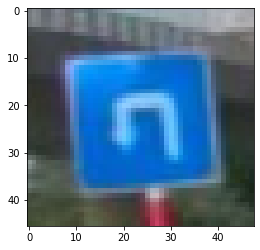

Được quay đầu
0.971315
---------------

1_8.png


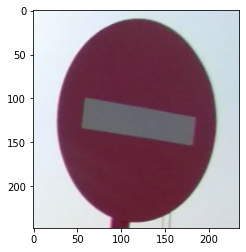

Cấm quay đầu
0.99981266
---------------

5_5.png


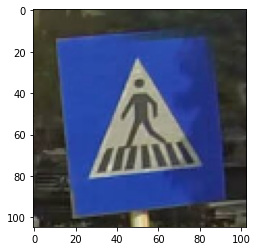

Người đi bộ sang đường
0.9681386
---------------

0_1.png


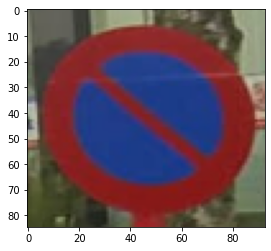

Cấm đỗ xe
0.98588437
---------------

6_2.png


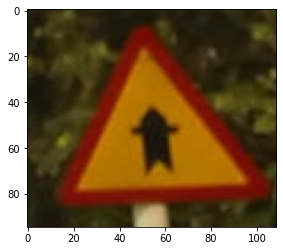

Giao nhau với đường không ưu tiên
0.9976388
---------------

4_8.png


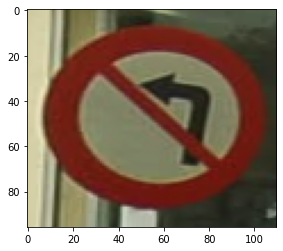

Cấm rẽ trái
0.9222768
---------------

8_1.png


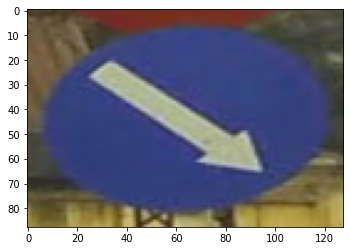

Hướng rẽ phải
0.9999989
---------------

7_9.png


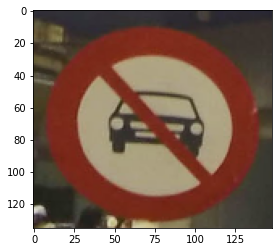

Cấm ô tô
0.9988319
---------------

Screenshot (436).png


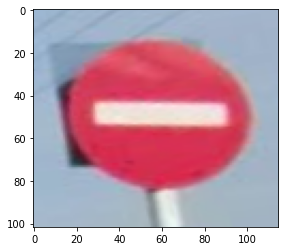

Cấm quay đầu
0.99950135
---------------

Screenshot (428).png


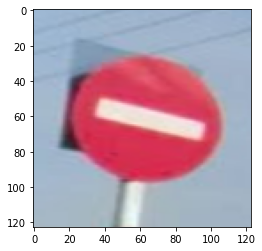

Cấm quay đầu
0.99964225
---------------

camquaydau.jpg


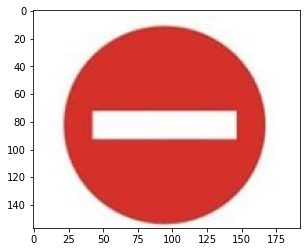

Cấm quay đầu
0.9997069
---------------

camxetaitren2phay5tan.jpg


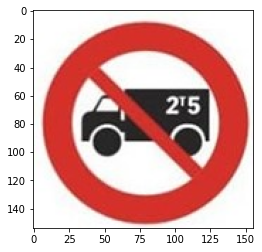

Không nhận được
1.7991992e-05
---------------

camretrai.jpg


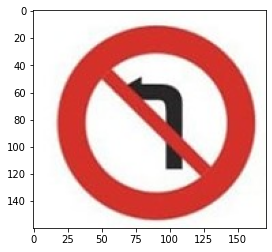

Cấm rẽ trái
0.9977731
---------------

camdox3.jpg


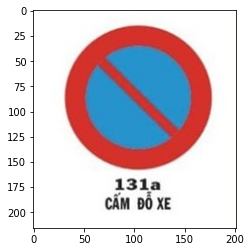

Cấm đỗ xe
0.99978656
---------------

Screenshot (482).png


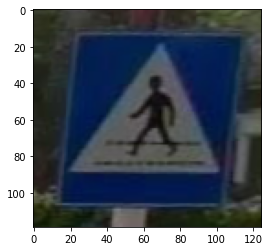

Người đi bộ sang đường
0.9760942
---------------

Screenshot (348).png


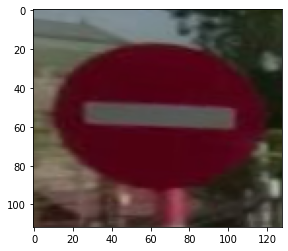

Cấm quay đầu
0.9990901
---------------

0_1(1).png


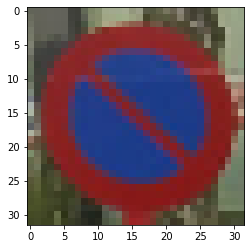

Cấm đỗ xe
0.98588437
---------------



In [ ]:
testPath = "/content/drive/MyDrive/phan_loai_bbgt/test"
for testImg in os.listdir(testPath):
  print(testImg)
  curImg = cv2.imread(testPath + "/" + testImg)
  plt.imshow(cv2.cvtColor(curImg,cv2.COLOR_BGR2RGB))
  plt.show()
  predict_class(curImg)
  print("---------------")
  print()